<a href="https://colab.research.google.com/github/hema082004/Fake_news/blob/main/Telugu_Fake_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install numpy pandas scikit-learn matplotlib seaborn nltk joblib

In [39]:
import pandas as pd
import json

# Load the dataset.json file
with open('/content/dataset.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

# Load annotation labels
label_df = pd.read_csv('/content/label.csv')

# Merge on serial number (common key for both)
df = df.merge(label_df, left_on="serial no", right_on="ID", how="inner")
df.head()


,serial no,site,claim,image,date,fact,ID,What is the rating of the news?,Any visual data required to judge the verdict?,To what extent is the news harmful to society?,Category of harm?
0,0,https://factly.in/telugu-digitally-edited-phot...,శ్రీ రాముడి యొక్క 3D చిత్రం దుబాయ్‌లోని బుర్జ...,https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",బుర్జ్ ఖలీఫా పైన శ్రీ రాముని చిత్రాన్ని ప్రదర్...,0,FALSE,Textual data is enough,1,Harmless
1,1,https://factly.in/telugu-this-way2news-news-ar...,"చెప్పులు వేసుకొని అయోధ్య ఆలయంలోకి ప్రవేశించి, ...",https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",ఈ వార్తను ‘Way2News’ ప్రచురించలేదు. ఇది వారి ...,1,FALSE,Visual data required,2,Threat to honor and trust in people and companies
2,2,https://factly.in/telugu-an-unrelated-video-of...,అయోధ్యలో జరగనున్న రామమందిర ప్రతిష్టాపన వేడుకక...,https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",వైరల్ వీడియోని జార్జియా మెలోని తన X (ట్విట్ట...,2,FALSE,Visual data required,1,Harmless
3,3,https://factly.in/telugu-the-display-of-lord-r...,శ్రీనగర్‌లోని క్లాక్ టవర్‌పై శ్రీరాముడి చిత్ర...,https://factly.in/wp-content/uploads//2024/01/...,"January 22, 2024",ఈ వీడియోలో కనిపిస్తున్న శ్రీరాముడి చిత్ర ప్రద...,3,half true & half false,Visual data required,1,Harmless
4,4,https://factly.in/telugu-a-video-of-nihal-sing...,శ్రీరాముని విగ్రహ ప్రతిష్టాపన వేడుకకు రెండు చ...,https://factly.in/wp-content/uploads//2024/01/...,"January 22, 2024",వైరల్ వీడియోలో కనిపిస్తున్న వ్యక్తి బీహార్‌కు...,4,FALSE,Visual data required,1,Harmless


In [40]:
df = df.rename(columns={
    "claim": "Text",
    "Q1": "Label"   # Q1 = True / False rating label
})


In [41]:
# Rename 'claim' to 'Text' if it exists
if 'claim' in df.columns:
    df = df.rename(columns={"claim": "Text"})
elif 'Text' not in df.columns:
    raise KeyError("Column 'claim' or 'Text' not found in DataFrame. Please ensure 'claim' exists or has already been renamed to 'Text'.")

# Rename 'What is the rating of the news?' to 'Label' if it exists
if 'What is the rating of the news?' in df.columns:
    df = df.rename(columns={"What is the rating of the news?": "Label"})
elif 'Label' not in df.columns:
    raise KeyError("Column 'What is the rating of the news?' or 'Label' not found in DataFrame. Please ensure the rating column exists or has already been renamed to 'Label'.")

# Convert string labels to numerical (0 for FALSE, 1 for others)
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'FALSE' else 1)

In [42]:
print(df.shape)
print(df['Label'].value_counts())
df.sample(5)


(510, 11)
Label
0    369
1    141
Name: count, dtype: int64


,serial no,site,Text,image,date,fact,ID,Label,Any visual data required to judge the verdict?,To what extent is the news harmful to society?,Category of harm?
71,71,https://factly.in/telugu-the-election-commissi...,భారత్ రాష్ట్ర సమితికి ఉన్న జాతీయ పార్టీ గుర్త...,https://factly.in/wp-content/uploads//2023/12/...,"December 6, 2023",కేంద్ర ఎన్నికల సంఘం ఇప్పటి వరకు బీఆర్ఎస్‌ పార...,71,0,Textual data is enough,1,Threat to correct understanding of politics an...
294,294,https://factly.in/telugu-the-telangana-governm...,తెలంగాణ ప్రభుత్వం మసీదుల్లో పని చేసే ఇమామ్ & ...,https://factly.in/wp-content/uploads//2023/08/...,"August 10, 2023",తెలంగాణ ప్రభుత్వం ఇటీవల విడుదల చేసిన ఉత్తర్వ...,294,0,Textual data is enough,2,Prejudice against country and race
72,72,https://factly.in/telugu-an-edited-video-is-be...,క్లెయిమ్: 2023 తెలంగాణ అసెంబ్లీ ఎన్నికల్లో ఒక...,https://lh7-us.googleusercontent.com/L8BTbnG7D...,"December 6, 2023",ఇది ఒక ఎడిట్ చేసిన వీడియో. వీడియో మొదటి భాగంలో...,72,0,Visual data required,2,Threat to correct understanding of politics an...
136,136,https://factly.in/telugu-an-old-video-of-feroz...,2023 ఎన్నికలలో తెలంగాణలో ఎక్కువ స్థానాలు బీజే...,https://factly.in/wp-content/uploads//2023/11/...,"November 1, 2023",ఇది 12 జులై 2022లో ఒక ఇంటర్వ్యూలో ఫిరోజ్ ఖాన్ ...,136,1,Visual data required,1,Threat to honor and trust in people and companies
161,161,https://factly.in/telugu-old-and-unrelated-vid...,ఈ వీడియోలు ఈజిప్ట్ దేశస్థులు పాలస్తీనా వారి కో...,https://factly.in/wp-content/uploads//2023/10/...,"October 16, 2023",ఈ రెండు వీడియోలూ హమాస్ ఇజ్రాయెల్ పైన దాడి చేసి...,161,0,Visual data required,1,Harmless


Accuracy: 0.5980392156862745

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72        74
           1       0.29      0.32      0.31        28

    accuracy                           0.60       102
   macro avg       0.51      0.51      0.51       102
weighted avg       0.61      0.60      0.60       102


Confusion Matrix:
 [[52 22]
 [19  9]]


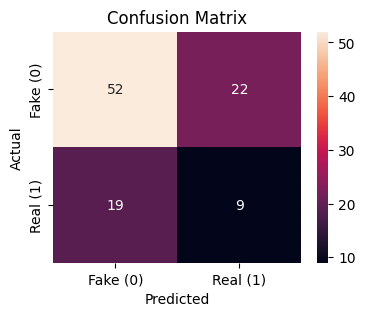

In [43]:
# --- Model Training & Evaluation ---

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier   # you can change to LogisticRegression if you want
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Features and Labels
X = df['Text']     # Telugu news text
y = df['Label']    # 0 = Fake, 1 = Real

# 2. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Train Model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 5. Predictions
y_pred = model.predict(X_test_tfidf)

# 6. Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

# 7. (Optional) Confusion Matrix Heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=['Fake (0)', 'Real (1)'],
            yticklabels=['Fake (0)', 'Real (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import json

# Load dataset.json
with open('dataset.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Load labels and merge
label_df = pd.read_csv('label.csv')
df = df.merge(label_df, left_on="serial no", right_on="ID", how="inner")

# Rename to ML format
df = df.rename(columns={"claim": "Text", "What is the rating of the news?": "Label"})

# Convert 0 = Fake, 1/2 = Real
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'FALSE' else 1)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df['Label'].value_counts())
df.head()

Dataset Loaded Successfully
Shape: (510, 11)
Label
0    369
1    141
Name: count, dtype: int64


,serial no,site,Text,image,date,fact,ID,Label,Any visual data required to judge the verdict?,To what extent is the news harmful to society?,Category of harm?
0,0,https://factly.in/telugu-digitally-edited-phot...,శ్రీ రాముడి యొక్క 3D చిత్రం దుబాయ్‌లోని బుర్జ...,https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",బుర్జ్ ఖలీఫా పైన శ్రీ రాముని చిత్రాన్ని ప్రదర్...,0,0,Textual data is enough,1,Harmless
1,1,https://factly.in/telugu-this-way2news-news-ar...,"చెప్పులు వేసుకొని అయోధ్య ఆలయంలోకి ప్రవేశించి, ...",https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",ఈ వార్తను ‘Way2News’ ప్రచురించలేదు. ఇది వారి ...,1,0,Visual data required,2,Threat to honor and trust in people and companies
2,2,https://factly.in/telugu-an-unrelated-video-of...,అయోధ్యలో జరగనున్న రామమందిర ప్రతిష్టాపన వేడుకక...,https://factly.in/wp-content/uploads//2024/01/...,"January 23, 2024",వైరల్ వీడియోని జార్జియా మెలోని తన X (ట్విట్ట...,2,0,Visual data required,1,Harmless
3,3,https://factly.in/telugu-the-display-of-lord-r...,శ్రీనగర్‌లోని క్లాక్ టవర్‌పై శ్రీరాముడి చిత్ర...,https://factly.in/wp-content/uploads//2024/01/...,"January 22, 2024",ఈ వీడియోలో కనిపిస్తున్న శ్రీరాముడి చిత్ర ప్రద...,3,1,Visual data required,1,Harmless
4,4,https://factly.in/telugu-a-video-of-nihal-sing...,శ్రీరాముని విగ్రహ ప్రతిష్టాపన వేడుకకు రెండు చ...,https://factly.in/wp-content/uploads//2024/01/...,"January 22, 2024",వైరల్ వీడియోలో కనిపిస్తున్న వ్యక్తి బీహార్‌కు...,4,0,Visual data required,1,Harmless
